In [71]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import seaborn as sns
import os
from glob import glob

## LOADING THE DATA

In [72]:
# importing the dataset ----> HAM 10000
df= pd.read_csv('HAM10000_metadata.csv')
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [73]:
# checking the data types of each features
df.dtypes

lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

## DATA PRE-PROCESSING

In [74]:
# Checking the null values
df.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [75]:
# Replacing the null values present in the 'age' with its mean
mean = int(df['age'].mean())
df['age'].fillna(mean,inplace=True)
df.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

In [76]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}
base_skin_dir = 'E:\dermatology'

# Merge images from both folders into one dictionary

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}


In [77]:
df['path'] = df['image_id'].map(imageid_path_dict.get)
df['cell_type'] = df['dx'].map(lesion_type_dict.get) 
df['cell_type_idx'] = pd.Categorical(df['cell_type']).codes
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,E:\dermatology\HAM10000_images_part_2\ISIC_003...,Benign keratosis-like lesions,2


In [ ]:
df['image'] = df['path'].map(lambda x: np.asarray(Image.open(x).resize((125,100))))

In [ ]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_type_idx,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,2,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,2,"[[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,2,"[[[186, 127, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,2,"[[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,E:\dermatology\HAM10000_images_part_2\ISIC_003...,Benign keratosis-like lesions,2,"[[[131, 88, 110], [142, 97, 120], [152, 107, 1..."


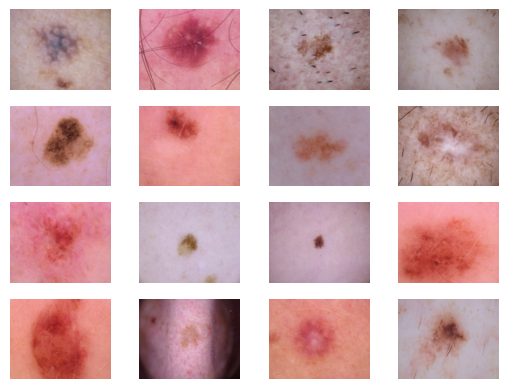

In [ ]:
# displaying some of the sample images
for i in range(16):
    random = np.random.randint(1,len(df))
    ax=plt.subplot(4,4,i+1)
    plt.imshow(df['image'][random])
    plt.axis(False)

In [ ]:
# Splitting the dataset
X = df.drop(['cell_type_idx','image_id','path'],axis=1)
y = df['cell_type_idx']

In [ ]:
X.head()

,lesion_id,dx,dx_type,age,sex,localization,cell_type,image
0,HAM_0000118,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."
1,HAM_0000118,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,"[[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2..."
2,HAM_0002730,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,"[[[186, 127, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,bkl,histo,80.0,male,scalp,Benign keratosis-like lesions,"[[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4..."
4,HAM_0001466,bkl,histo,75.0,male,ear,Benign keratosis-like lesions,"[[[131, 88, 110], [142, 97, 120], [152, 107, 1..."


In [ ]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: cell_type_idx, dtype: int8

In [ ]:
X.shape , y.shape

((10015, 8), (10015,))

In [30]:
features=df.drop(columns=['cell_type_idx'],axis=1)
target=df['cell_type_idx']

In [31]:
features.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,"[[[189, 152, 194], [192, 156, 198], [191, 154,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,"[[[24, 13, 22], [24, 14, 22], [24, 14, 26], [2..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,"[[[186, 127, 135], [189, 133, 145], [192, 135,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,E:\dermatology\HAM10000_images_part_1\ISIC_002...,Benign keratosis-like lesions,"[[[24, 11, 17], [24, 11, 20], [30, 15, 25], [4..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,E:\dermatology\HAM10000_images_part_2\ISIC_003...,Benign keratosis-like lesions,"[[[131, 88, 110], [142, 97, 120], [152, 107, 1..."


In [32]:
from sklearn.model_selection import train_test_split
x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(features, target, test_size=0.25,random_state=666)
tf.unique(x_train_o.cell_type.values)

Unique(y=<tf.Tensor: shape=(7,), dtype=string, numpy=
array([b'Melanocytic nevi', b'Basal cell carcinoma', b'Melanoma',
       b'Vascular lesions', b'Benign keratosis-like lesions ',
       b'Actinic keratoses', b'Dermatofibroma'], dtype=object)>, idx=<tf.Tensor: shape=(7511,), dtype=int32, numpy=array([0, 1, 0, ..., 1, 0, 0])>)

In [33]:
x_train = np.asarray(x_train_o['image'].tolist())
x_test = np.asarray(x_test_o['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

In [34]:
# Perform one-hot encoding on the labels
y_train = to_categorical(y_train_o, num_classes = 7)
y_test = to_categorical(y_test_o, num_classes = 7)
y_test

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

## Building a Convolutional Neural Network (CNN)

In [342]:
# importing the necessary libraries and mocdules required to build CNN
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D, MaxPool2D
# from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers.legacy import Adam
from keras.utils import to_categorical

In [35]:
# Creating an additional validation set
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 999)
# Reshape image in 3 dimensions (height = 100, width = 125 , canal = 3)
x_train = x_train.reshape(x_train.shape[0], *(100, 125, 3))
x_test = x_test.reshape(x_test.shape[0], *(100, 125, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(100, 125, 3))
# With data augmentation to prevent overfitting 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.12,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.12,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

datagen.fit(x_train)

In [ ]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=4, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [348]:
model1 = tf.keras.models.Sequential ([
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='Same',input_shape=(100,125,3)),
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu',padding='Same'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(750,activation='relu'),
    tf.keras.layers.Dropout((0.5)),
    
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dropout((0.5)),
    
    tf.keras.layers.Dense(7,activation='softmax')
])
    
    
model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss = 'CategoricalCrossentropy',
               metrics=['accuracy'])

history1 = model1.fit_generator(datagen.flow(x_train,y_train, batch_size=32),
                              epochs = 50, validation_data = (x_validate,y_validate),
                              steps_per_epoch=x_train.shape[0] // 32,
                              callbacks = [learning_rate_reduction],
                              verbose = 1,
                              shuffle=True)



C:\Users\KHAN\AppData\Local\Temp\ipykernel_5548\2022457632.py:28: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1 = model1.fit_generator(datagen.flow(x_train,y_train, batch_size=32),


Epoch 1/50
211/211 [==============================] - 231s 1s/step - loss: 1.0398 - accuracy: 0.6608 - val_loss: 0.9427 - val_accuracy: 0.6556 - lr: 1.0000e-04
Epoch 2/50
211/211 [==============================] - 218s 1s/step - loss: 0.9165 - accuracy: 0.6722 - val_loss: 0.9055 - val_accuracy: 0.6848 - lr: 1.0000e-04
Epoch 3/50
211/211 [==============================] - 221s 1s/step - loss: 0.8645 - accuracy: 0.6862 - val_loss: 0.8529 - val_accuracy: 0.6902 - lr: 1.0000e-04
Epoch 4/50
211/211 [==============================] - 226s 1s/step - loss: 0.8344 - accuracy: 0.6953 - val_loss: 0.8207 - val_accuracy: 0.6769 - lr: 1.0000e-04
Epoch 5/50
211/211 [==============================] - 217s 1s/step - loss: 0.8002 - accuracy: 0.7046 - val_loss: 0.7934 - val_accuracy: 0.7008 - lr: 1.0000e-04
Epoch 6/50
211/211 [==============================] - 219s 1s/step - loss: 0.7788 - accuracy: 0.7159 - val_loss: 0.8006 - val_accuracy: 0.6955 - lr: 1.0000e-04
Epoch 7/50
211/211 [====================

<Axes: >

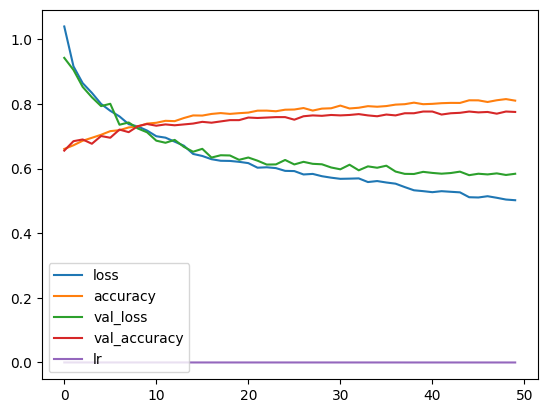

In [426]:
pd.DataFrame(history1.history).plot()

## Making predictions using the built model

In [350]:
model1.save("model1.h5")

C:\Users\KHAN\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [351]:
from tensorflow.keras.models import load_model
# Load the model for verification
loaded_model = load_model('model1.h5')

In [412]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import os

# Load the trained model
model = keras.models.load_model('model.h5')  # Replace with the path to your trained model

# Defining a function to classify an image
def classify_skin_disease(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(100, 125))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)

    # Making the predictions
    predictions = model1.predict(img)

    # Getting the class label with the highest probability
    predicted_class_index = np.argmax(predictions)
    
    # Map class index to class label
    class_mapping = {
        0: 'Actinic keratosis', 1:'Melanocytic', 2:'Benign keratosis-like lesions', 3: 'Basal cell carcinoma', 4: 'Melanocytic nevi', 5: 'Vascular lesions', 6: 'Dermatofibroma'
    }
    
    predicted_class_label = class_mapping.get(predicted_class_index, 'Unknown')

    return predicted_class_label



In [413]:
from matplotlib import image as mpimg

# Creating a helper function to predict the class on random images
def predict_on_random():

    random = np.random.randint(1,len(df))
    image_path = df['path'][random]
    predicted_class = classify_skin_disease(image_path)
    plt.title(f"Predicted class : {predicted_class}\nActual class : {df['cell_type'][random]}\nAccuracy : {accuracy*100}%")
    image = mpimg.imread(df['path'][random])
    plt.imshow(image)
    plt.axis(False)
    plt.show()

1/1 [==============================] - 0s 47ms/step


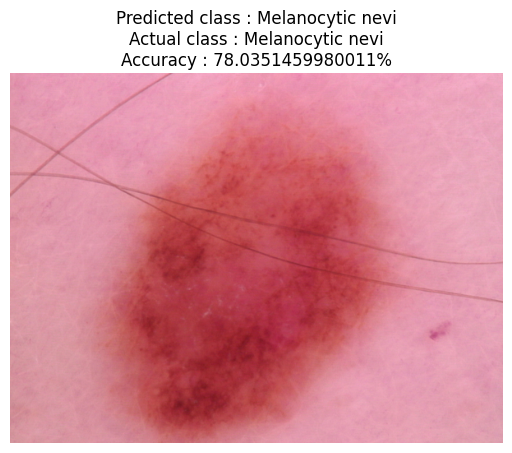

In [422]:
predict_on_random()

## Evaluating the model

In [423]:
loss, accuracy = model1.evaluate(x_test, y_test, verbose=1)
loss_v, accuracy_v = model1.evaluate(x_validate, y_validate, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))

24/24 [==============================] - 3s 109ms/step - loss: 0.5840 - accuracy: 0.7753
Validation: accuracy = 0.775266  ;  loss_v = 0.583997
Test: accuracy = 0.780351  ;  loss = 0.596279


In [424]:
y_pred = model1.predict(x_test)
y_pred

79/79 [==============================] - 10s 120ms/step


array([[9.56801996e-02, 1.72746554e-02, 1.76435947e-01, ...,
        5.41672766e-01, 1.57751933e-01, 9.43736348e-04],
       [1.25316565e-03, 2.43116869e-03, 7.50005022e-02, ...,
        9.13735211e-01, 2.25860416e-03, 2.06142176e-05],
       [1.70119200e-02, 7.25719496e-04, 3.88113528e-01, ...,
        1.50464132e-01, 4.42227393e-01, 4.03295926e-05],
       ...,
       [1.90420877e-07, 7.20328160e-07, 3.15268873e-04, ...,
        9.99569476e-01, 1.04804836e-04, 2.89497819e-07],
       [1.68071035e-02, 6.63750665e-03, 1.37417436e-01, ...,
        5.98706782e-01, 3.30824777e-03, 1.70073041e-03],
       [6.13783691e-09, 1.88437767e-07, 9.86606756e-06, ...,
        9.99957085e-01, 1.55325361e-05, 1.45840170e-06]], dtype=float32)

In [425]:
y_pred_index = np.argmax(y_pred,axis=1)
y_pred_index

array([4, 4, 5, ..., 4, 4, 4], dtype=int64)

In [367]:
# Helper function to plot the confusion matrix
import itertools
# Function to plot confusion matrix    
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



79/79 [==============================] - 7s 92ms/step


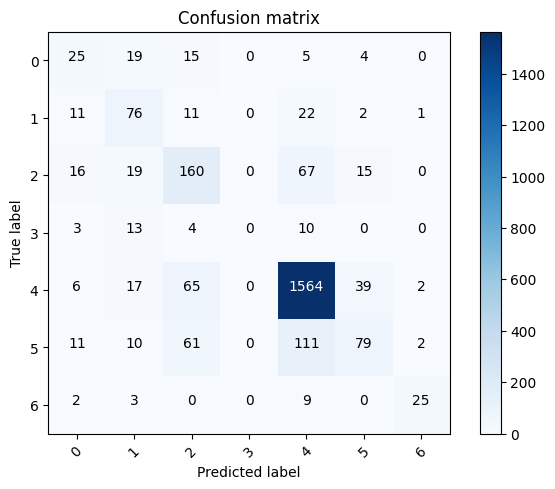

In [368]:
# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

 

# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [378]:
import numpy as np
from sklearn.metrics import classification_report

y_pred_indices = np.argmax(y_pred, axis=1)

report = classification_report(Y_true, y_pred_indices)

print(report)

              precision    recall  f1-score   support

           0       0.38      0.44      0.41        68
           1       0.58      0.63      0.60       123
           2       0.55      0.59      0.57       277
           3       0.67      0.07      0.12        30
           4       0.87      0.92      0.89      1693
           5       0.58      0.34      0.43       274
           6       0.88      0.72      0.79        39

    accuracy                           0.78      2504
   macro avg       0.64      0.53      0.55      2504
weighted avg       0.77      0.78      0.77      2504

